<a href="https://colab.research.google.com/github/kunalsingh286/machine-learning-projects/blob/main/dailyBirthsForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install prophet

In [24]:
import pandas as pd
import numpy as np
import prophet
from prophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y']
df.head()

<ipython-input-25-9ff60de5f55c>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'], date_parser=pd.to_datetime)


,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 1.0, 'Daily Female Births in 1959')

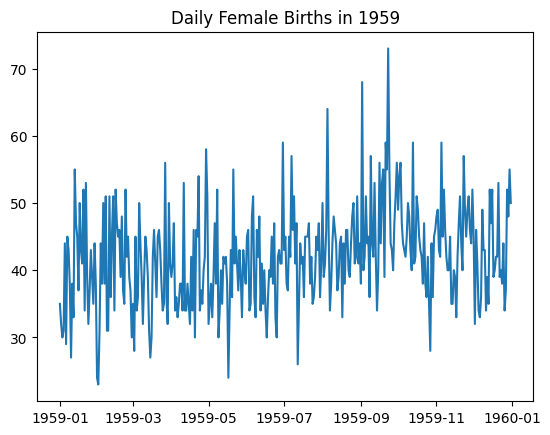

In [26]:
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959')

In [29]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = prophet.Prophet(yearly_seasonality=True, daily_seasonality=False,
                          changepoint_range=0.9,
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(df)
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmprtti36cl/8m_u0jf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprtti36cl/mwn8gnzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54866', 'data', 'file=/tmp/tmprtti36cl/8m_u0jf6.json', 'init=/tmp/tmprtti36cl/mwn8gnzg.json', 'output', 'file=/tmp/tmprtti36cl/prophet_model01_jqp6i/prophet_model-20240616180140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:01:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


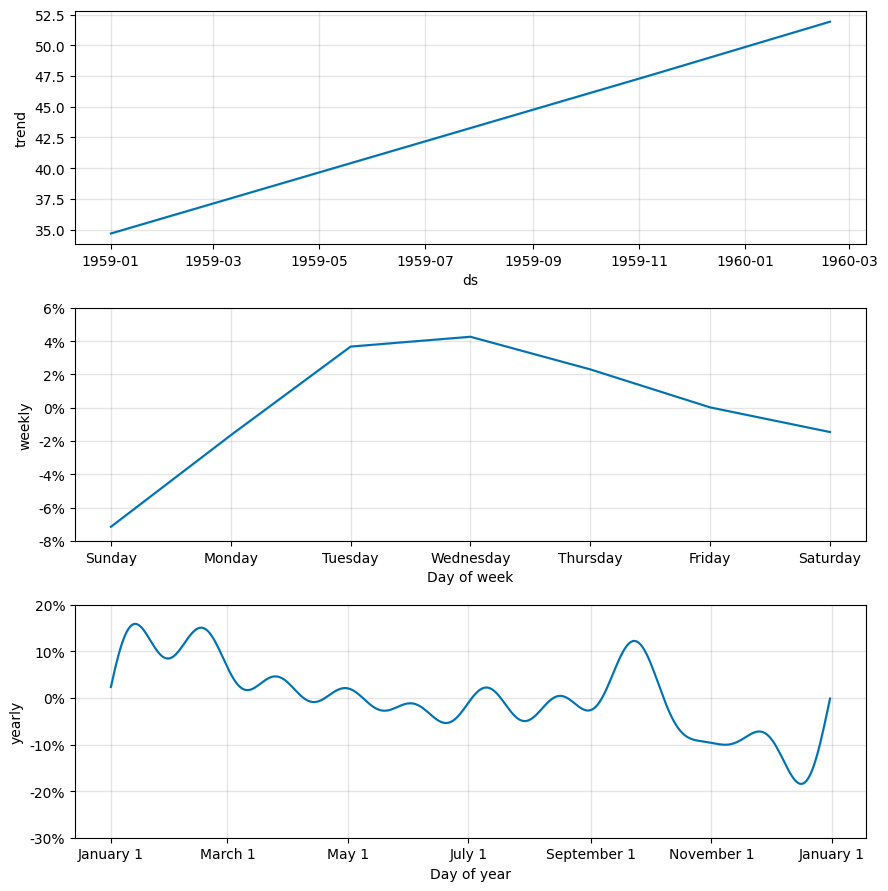

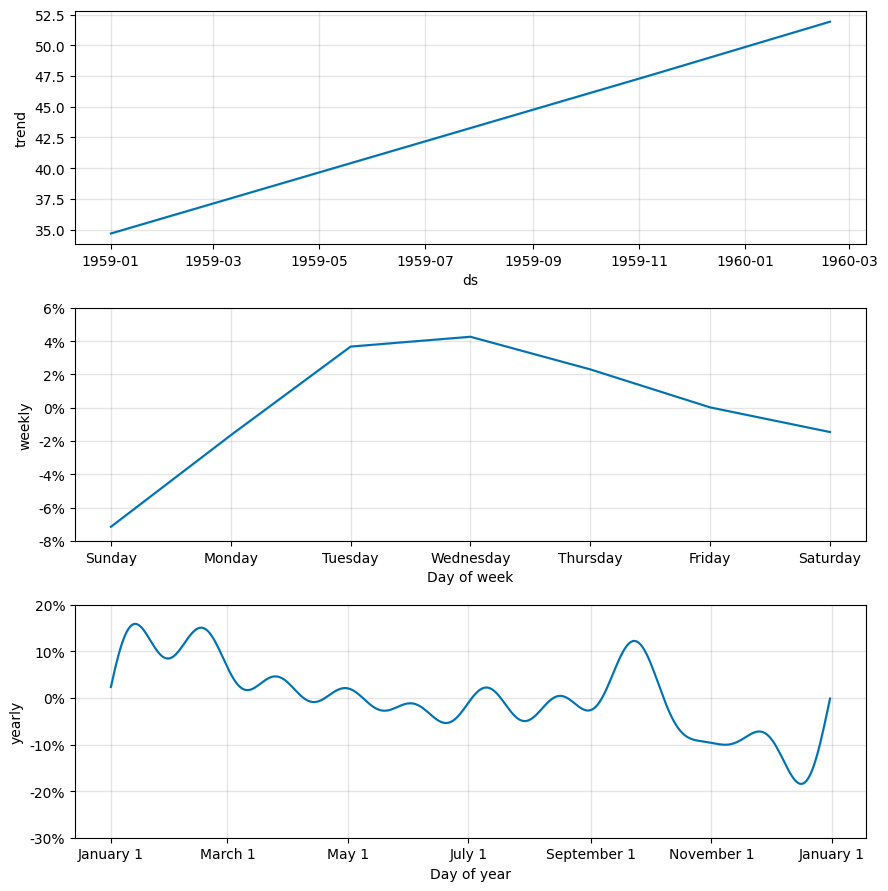

In [30]:
m.plot_components(forecast)

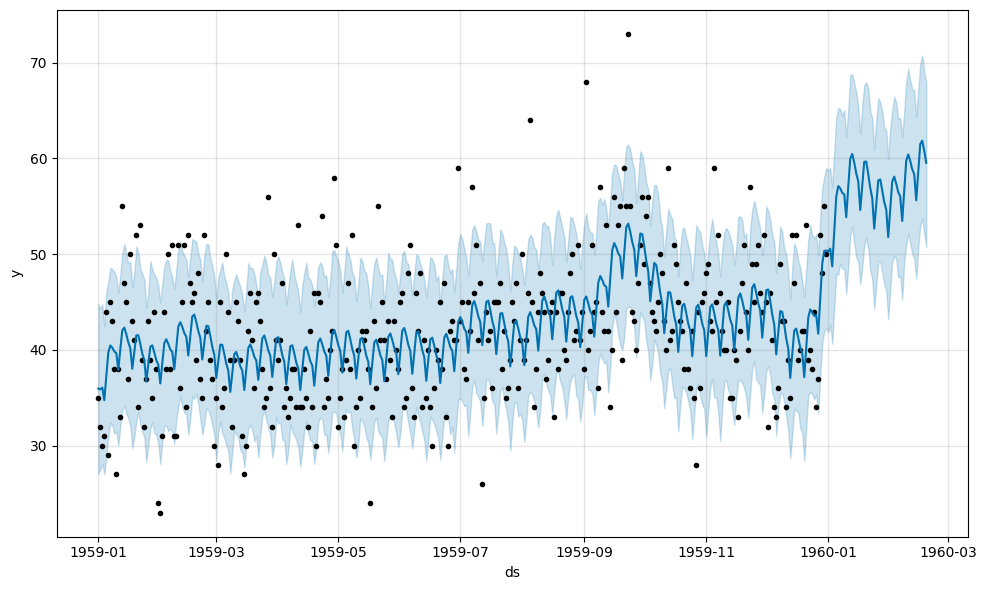

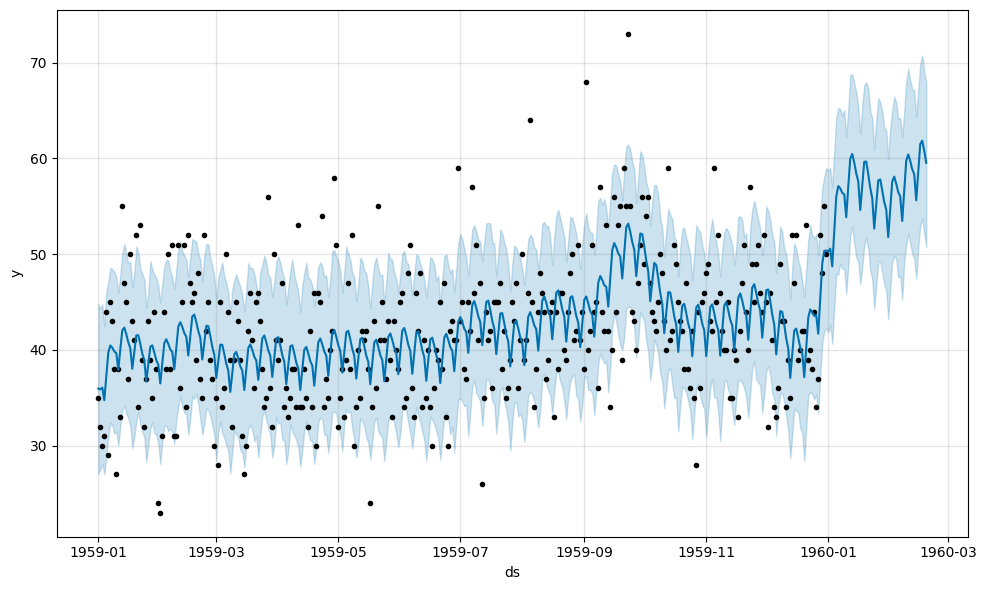

In [31]:
m.plot(forecast)